In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
df = pd.read_csv ("/Users/mohadeseh/Documents/me/session8/data_mining/FDM_Project_dataset-99-2/divar_dataset/divar_posts_dataset.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947635 entries, 0 to 947634
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       947635 non-null  int64  
 1   archive_by_user  947635 non-null  bool   
 2   brand            190892 non-null  object 
 3   cat1             947635 non-null  object 
 4   cat2             945877 non-null  object 
 5   cat3             775301 non-null  object 
 6   city             947635 non-null  object 
 7   created_at       947635 non-null  object 
 8   desc             947635 non-null  object 
 9   id               947635 non-null  int64  
 10  image_count      947635 non-null  int64  
 11  mileage          120451 non-null  float64
 12  platform         947635 non-null  object 
 13  price            947635 non-null  int64  
 14  title            947635 non-null  object 
 15  type             98529 non-null   object 
 16  year             120451 non-null  obje

In [42]:
df = df[(df['price'] != -1)]
df


,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN
5,5,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 09PM,بسیارتمیزوسالم وچوب راش فقط به علت جابه جایی و...,48029048440635,4,NaN,mobile,1000000,مبل استیل,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,947630,True,NaN,for-the-home,building-and-garden,stove-and-heating,Shiraz,Friday 07AM,دوعدد یکی یک متری و دیگری 1.4 متری موجود است\n...,16127180351093,1,NaN,web,180000,رادیاتور پنلی نو ترک,NaN,NaN
947631,947631,True,NaN,electronic-devices,audio-video,camera-camcoders,Tehran,Friday 02PM,دوربین هندی کم کنون مدل لگریا fs36\n\nعکاسی و ...,29805298491725,1,NaN,mobile,350000,دوربین هندی کم کنون,NaN,NaN
947632,947632,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Shiraz,Friday 04PM,پراید دوگانه کارخانه میباشد و کم کارکرد.روکش ....,55514317985619,3,43000.0,mobile,17400000,پراید دوگانه کارخانه مدل93,NaN,1393
947633,947633,True,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Friday 05PM,مونو پد یانگ تد همراه با پایه و اینه عقبش\nواس...,65938921533442,1,NaN,mobile,40000,مونوپد یانگ تد خیلی تمیز و نو,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786203 entries, 0 to 947634
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       786203 non-null  int64  
 1   archive_by_user  786203 non-null  bool   
 2   brand            167140 non-null  object 
 3   cat1             786203 non-null  object 
 4   cat2             784931 non-null  object 
 5   cat3             650276 non-null  object 
 6   city             786203 non-null  object 
 7   created_at       786203 non-null  object 
 8   desc             786203 non-null  object 
 9   id               786203 non-null  int64  
 10  image_count      786203 non-null  int64  
 11  mileage          103799 non-null  float64
 12  platform         786203 non-null  object 
 13  price            786203 non-null  int64  
 14  title            786203 non-null  object 
 15  type             87333 non-null   object 
 16  year             103799 non-null  obje

In [44]:
df = df[(df['cat2'].notnull())]
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN
5,5,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 09PM,بسیارتمیزوسالم وچوب راش فقط به علت جابه جایی و...,48029048440635,4,NaN,mobile,1000000,مبل استیل,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,947630,True,NaN,for-the-home,building-and-garden,stove-and-heating,Shiraz,Friday 07AM,دوعدد یکی یک متری و دیگری 1.4 متری موجود است\n...,16127180351093,1,NaN,web,180000,رادیاتور پنلی نو ترک,NaN,NaN
947631,947631,True,NaN,electronic-devices,audio-video,camera-camcoders,Tehran,Friday 02PM,دوربین هندی کم کنون مدل لگریا fs36\n\nعکاسی و ...,29805298491725,1,NaN,mobile,350000,دوربین هندی کم کنون,NaN,NaN
947632,947632,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Shiraz,Friday 04PM,پراید دوگانه کارخانه میباشد و کم کارکرد.روکش ....,55514317985619,3,43000.0,mobile,17400000,پراید دوگانه کارخانه مدل93,NaN,1393
947633,947633,True,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Friday 05PM,مونو پد یانگ تد همراه با پایه و اینه عقبش\nواس...,65938921533442,1,NaN,mobile,40000,مونوپد یانگ تد خیلی تمیز و نو,NaN,NaN


In [45]:
df = df[(df['cat3'].notnull())]
df

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN
5,5,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 09PM,بسیارتمیزوسالم وچوب راش فقط به علت جابه جایی و...,48029048440635,4,NaN,mobile,1000000,مبل استیل,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,947630,True,NaN,for-the-home,building-and-garden,stove-and-heating,Shiraz,Friday 07AM,دوعدد یکی یک متری و دیگری 1.4 متری موجود است\n...,16127180351093,1,NaN,web,180000,رادیاتور پنلی نو ترک,NaN,NaN
947631,947631,True,NaN,electronic-devices,audio-video,camera-camcoders,Tehran,Friday 02PM,دوربین هندی کم کنون مدل لگریا fs36\n\nعکاسی و ...,29805298491725,1,NaN,mobile,350000,دوربین هندی کم کنون,NaN,NaN
947632,947632,True,پراید صندوق‌دار::Pride,vehicles,cars,light,Shiraz,Friday 04PM,پراید دوگانه کارخانه میباشد و کم کارکرد.روکش ....,55514317985619,3,43000.0,mobile,17400000,پراید دوگانه کارخانه مدل93,NaN,1393
947633,947633,True,NaN,electronic-devices,mobile-tablet,mobile-tablet-accessories,Mashhad,Friday 05PM,مونو پد یانگ تد همراه با پایه و اینه عقبش\nواس...,65938921533442,1,NaN,mobile,40000,مونوپد یانگ تد خیلی تمیز و نو,NaN,NaN


In [72]:
X = df[['cat1','cat2','cat3','brand','city']]
X = pd.get_dummies(X)
Y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.33,random_state=44)
X

,cat1_businesses,cat1_electronic-devices,cat1_for-the-home,cat1_leisure-hobbies,cat1_personal,cat1_vehicles,cat2_animals,cat2_audio-video,cat2_baby-and-toys,cat2_book-student-literature,...,brand_کیا::Kia,city_Ahvaz,city_Isfahan,city_Karaj,city_Kermanshah,city_Mashhad,city_Qom,city_Shiraz,city_Tabriz,city_Tehran
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
947631,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
947632,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
947633,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
scalingFeature = MinMaxScaler()
y_train = scalingFeature.fit_transform(np.array(y_train).reshape(-1,1))
[y_train.min(), y_train.max()]

[0.0, 1.0]

In [74]:
regr = linear_model.LinearRegression()

In [75]:
regr.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = regr.predict(X_test)
# [y_pred.min(),y_pred.max()]

In [77]:
y_pred = scalingFeature.inverse_transform(y_pred)
# [y_pred.min(),y_pred.max()]

In [78]:
# print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

In [79]:
print('Coefficient of determination: %.2f'% r2_score(y_test,y_pred))

Coefficient of determination: 0.68


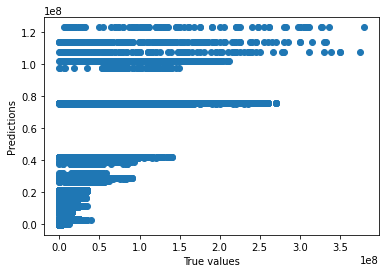

In [80]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.ylabel('Predictions')
plt.xlabel('True values')
plt.show()

# KNeighborsRegressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)

KNeighborsRegressor()

In [42]:
y_predict = reg.predict(X_test)

In [43]:
print('Coefficient of determination: %.2f'% r2_score(y_test, y_predict))

Coefficient of determination: 0.65
